# Entrenamiento de Modelo para predecir el mejor precio de una casa

## Importamos Librerias

In [19]:
#Librerias basicas
import pandas as pd 
import numpy as np

#Librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias de Machine Learning


# DataSet

In [20]:
#abrimos csv

path = "kc_house_data.csv"

df = pd.read_csv(path)

In [21]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Obtenemos la informacion necesaria

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [23]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Notamos que no encontramos ningun valor faltante o no valido

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Arreglamos EDA

## Variables

In [25]:
categoricas = ["id", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "zipcode", 
               "lat", "long",'yr_renovated']

numericas = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', "sqft_basement", 'yr_built', 
             'sqft_living15', 'sqft_lot15']

In [26]:
df[numericas].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


In [27]:
for i in categoricas:
    print(f'La columna es: {i}')
    print(df[i].value_counts())

La columna es: id
id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64
La columna es: bedrooms
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
La columna es: bathrooms
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64
La columna es: floors
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Na

In [29]:
df = df.drop("id", axis=1)
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)
df = df.drop("sqft_living15", axis=1)
df = df.drop("sqft_lot15", axis=1)
df = df.drop("date", axis=1)

In [30]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027


## Graficamos

#### Visualizamos las habitaciones por el precio, y banos por el precio

In [31]:
for i in range(len(df["bedrooms"])):
    if df["bedrooms"][i] > 10:
        df.loc[i, "bedrooms"] = 10

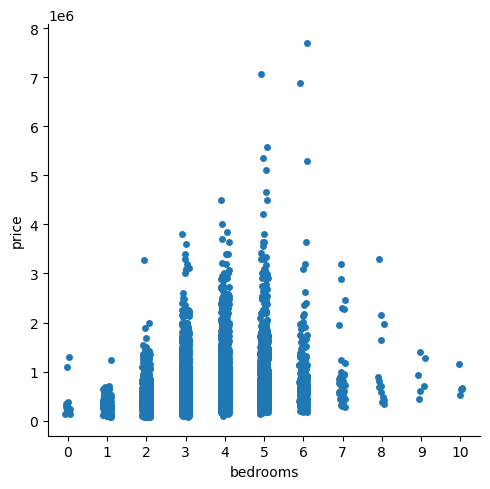

In [32]:
sns.catplot(data=df, x='bedrooms', y='price')

In [33]:
df['bathrooms']=pd.Series([round(val, 0) for val in df["bathrooms"]])

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027


<Figure size 1500x1500 with 0 Axes>

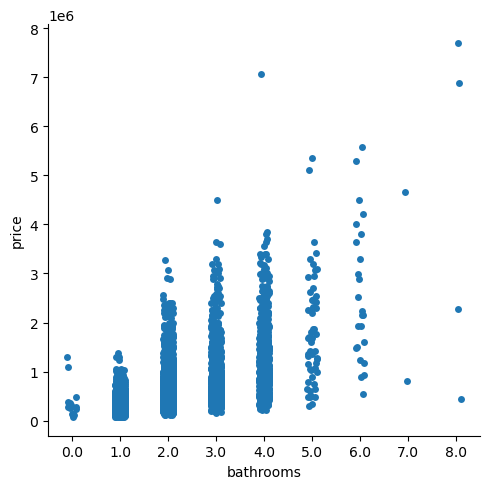

In [35]:
plt.figure(figsize=(15, 15))
sns.catplot(x ="bathrooms", y="price", data = df)

Podemos notar que no hay mayor precio a mayor cantidad de habitaciones, pero si hay un mayor precio a mayor numero de banos. Es cierto que hay pocas viviendas en con mayor cantidad de banos.

* Concluyo que el precio depende del tamano.

<Figure size 5000x5000 with 0 Axes>

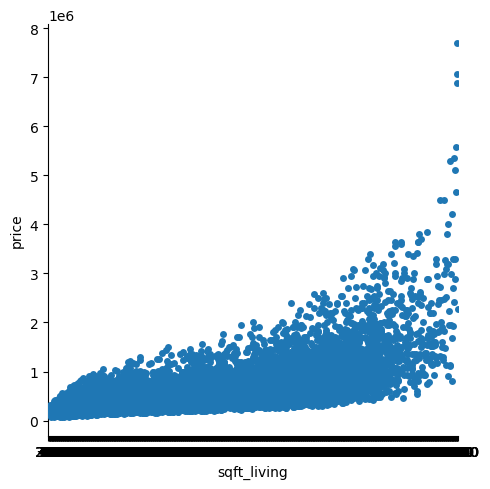

In [36]:
plt.figure(figsize=(50, 50))
sns.catplot(data=df, x="sqft_living", y='price')